<a href="https://colab.research.google.com/github/23521316/ComputerVision/blob/main/GrabCutAlgorithmforBackgroundRemoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt
import sys

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


In [2]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg

--2024-11-08 07:48:57--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg [following]
--2024-11-08 07:48:57--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17368 (17K) [image/jpeg]
Saving to: ‘woman.jpeg’

woman.jpeg          100%[===================>]  16.96K  --.-KB/s    in 0.001s  

2024-11-08 07:48:57 (24.7 MB/s) - ‘woman.jpeg’ saved [17368/17368]



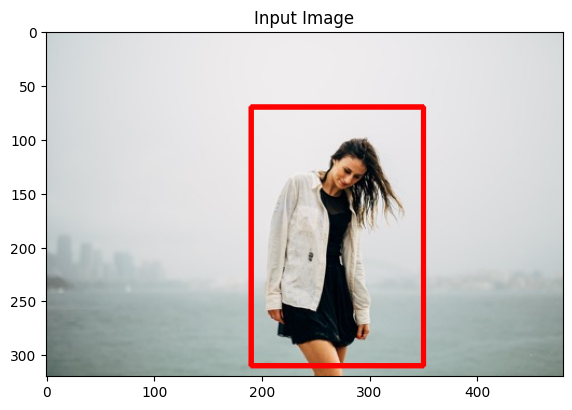

In [10]:
image = cv2.imread("woman.jpeg")
copy = image.copy()

mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

x1, y1, x2, y2 = 190, 70, 350, 310
start = (x1, y1)
end = (x2, y2)

rect = (x1, y1, x2-x1, y2-y1)

cv2.rectangle(copy, start, end, (0, 0, 255), 3)

imshow("Input Image", copy)

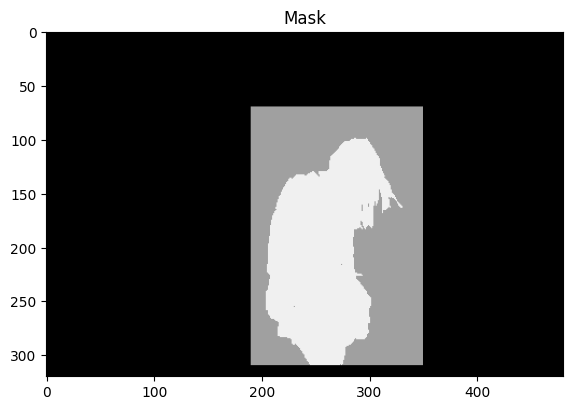

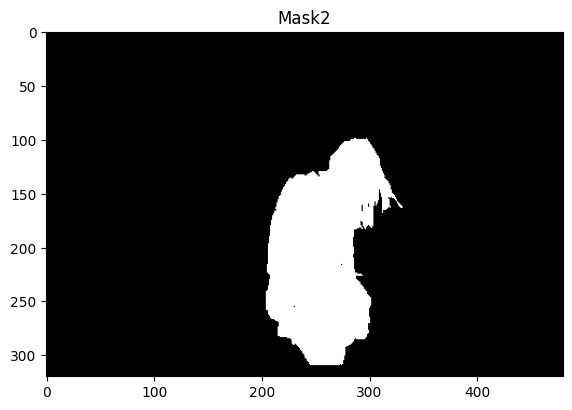

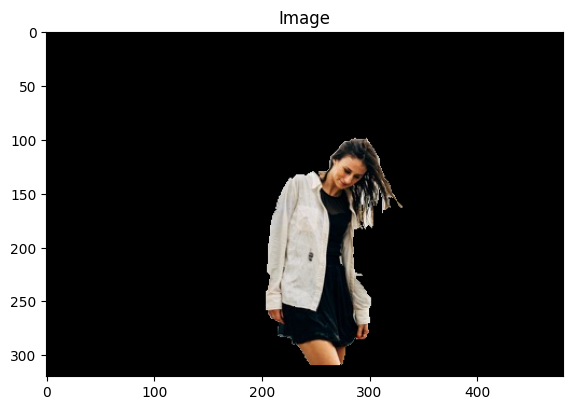

In [11]:
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image = image * mask2[:,:,np.newaxis]

imshow("Mask", mask * 80)
imshow("Mask2", mask2 * 255)
imshow("Image", image)